In [1]:
import tensorflow as tf
import wandb
from wandb.integration.keras import WandbCallback

USE_WANDB = True
EPOCHS = 15

2024-07-28 21:05:55.646801: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-28 21:05:55.648399: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 21:05:55.671124: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 21:05:55.671158: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 21:05:55.671185: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
# Load CIFAR100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train/255, x_test/255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [3]:
if USE_WANDB:
    wandb.init(project="federated_learning",
               group="group_1", name=f"tf_centralized_{EPOCHS}epochs")

# Create the model


def create_keras_model():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(
            20, (5, 5), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(50, (5, 5), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


# Create and compile the model
model = create_keras_model()
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

# Train the model.
callbacks = [WandbCallback(mode="auto",log_weights=True, training_data=(
    x_train, y_train), validation_data=(x_test, y_test), input_type="images")] if USE_WANDB else []

history = model.fit(x_train, y_train, epochs=EPOCHS, validation_data=(
    x_test, y_test), callbacks=callbacks, batch_size=40)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_accuracy:.4f}")

if USE_WANDB:
    wandb.finish()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: sklein-at (speml). Use `wandb login --relogin` to force relogin


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/15
2/2 [==============================] - 0s 2ms/step0s - loss: 1.5030 - categorical_accuracy: 0.45


/var/home/stephan/Dev/tu/speml24-2/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best/assets


INFO:tensorflow:Assets written to: /var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best/assets
wandb: Adding directory to artifact (/var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best)... Done. 0.0s


1000/1000 [==============================] - 7s 7ms/step - loss: 1.5008 - categorical_accuracy: 0.4557 - val_loss: 1.4482 - val_categorical_accuracy: 0.4998
Epoch 2/15
2/2 [==============================] - 0s 2ms/step0s - loss: 1.1445 - categorical_accuracy: 0.59


/var/home/stephan/Dev/tu/speml24-2/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best/assets


INFO:tensorflow:Assets written to: /var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best/assets
wandb: Adding directory to artifact (/var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best)... Done. 0.0s


1000/1000 [==============================] - 6s 6ms/step - loss: 1.1442 - categorical_accuracy: 0.5972 - val_loss: 1.1332 - val_categorical_accuracy: 0.5997
Epoch 3/15
2/2 [==============================] - 0s 2ms/step0s - loss: 0.9671 - categorical_accuracy: 0.66


/var/home/stephan/Dev/tu/speml24-2/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best/assets


INFO:tensorflow:Assets written to: /var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best/assets
wandb: Adding directory to artifact (/var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best)... Done. 0.0s


1000/1000 [==============================] - 6s 6ms/step - loss: 0.9672 - categorical_accuracy: 0.6623 - val_loss: 0.9820 - val_categorical_accuracy: 0.6554
Epoch 4/15
2/2 [==============================] - 0s 2ms/step0s - loss: 0.8428 - categorical_accuracy: 0.70


/var/home/stephan/Dev/tu/speml24-2/myenv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best/assets


INFO:tensorflow:Assets written to: /var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best/assets
wandb: Adding directory to artifact (/var/home/stephan/Dev/tu/speml24-2/code/wandb/run-20240728_210558-puvcqdb9/files/model-best)... Done. 0.0s


1000/1000 [==============================] - 6s 6ms/step - loss: 0.8425 - categorical_accuracy: 0.7043 - val_loss: 0.9229 - val_categorical_accuracy: 0.6795
Epoch 5/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.7240 - categorical_accuracy: 0.7471 - val_loss: 0.9354 - val_categorical_accuracy: 0.6888
Epoch 6/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6192 - categorical_accuracy: 0.7822 - val_loss: 0.9621 - val_categorical_accuracy: 0.6873
Epoch 7/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.5144 - categorical_accuracy: 0.8180 - val_loss: 0.9719 - val_categorical_accuracy: 0.6939
Epoch 8/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4249 - categorical_accuracy: 0.8519 - val_loss: 1.1055 - val_categorical_accuracy: 0.6721
Epoch 9/15
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3365 - categorical_accuracy: 0.8816 - val_loss: 1.1594 - val_categorical_accuracy: 0.6790
Epo

categorical_accuracy,▁▃▄▄▅▆▆▇▇▇█████
epoch,▁▁▂▃▃▃▄▅▅▅▆▇▇▇█
loss,█▆▅▅▄▄▃▃▂▂▁▁▁▁▁
val_categorical_accuracy,▁▅▇▇███▇▇██▇█▇▇
val_loss,▅▂▁▁▁▁▁▂▃▃▄▅▆██
best_epoch,3
best_val_loss,0.92292
categorical_accuracy,0.95902
epoch,14
loss,0.1177
val_categorical_accuracy,0.6762


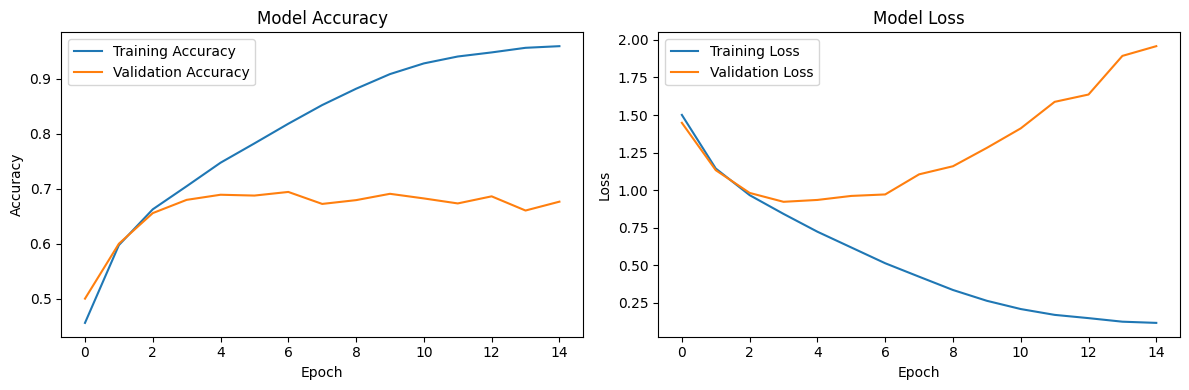

In [4]:

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'],
         label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()